In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
drop()

In [0]:
data = pd.read_csv('/content/drive/My Drive/데이터분석/train.csv')

# 1. train.csv 탐색

info, describe, head 등을 이용해서 데이터 탐색해주세요

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 데이터 시각화

### 1) 아래의 그래프처럼 티켓 클래스별로 산 사람과 죽은 사람을 bar chart로 보여주세요

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


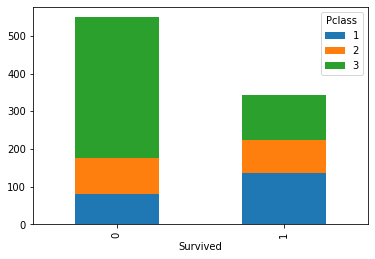

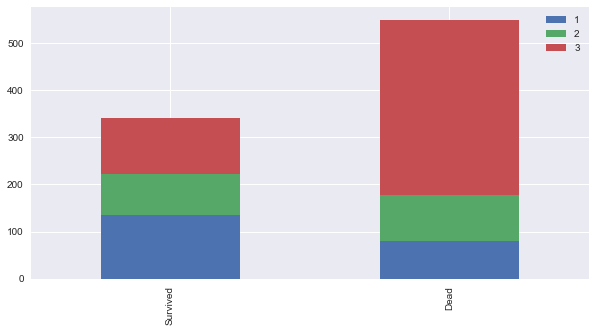

### 2) 아래의 그래프처럼 가족 수별로 산 사람과 죽은 사람을 bar chart로 보여주세요

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


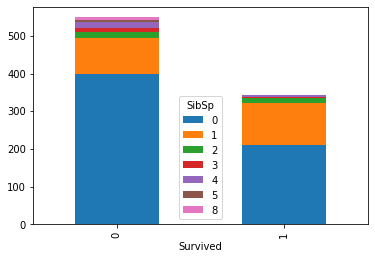

In [57]:
Sib = data[['Survived','SibSp','PassengerId']]
df = Sib.groupby(['Survived','SibSp'])['PassengerId'].count().unstack()
display(df)
df.plot(kind='bar', stacked=True)

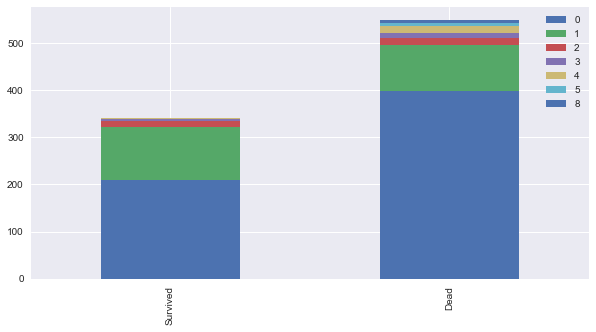

# 3. 데이터 전처리

# 3-1. Name 처리

In [144]:
# .앞에 있는 글자 모두 불러오기
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.')
# 어떤 글자가 몇개 있는지 확인
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Ms            1
Countess      1
Jonkheer      1
Sir           1
Capt          1
Mme           1
Lady          1
Name: Title, dtype: int64

In [0]:
# 가장 많은 세개는 0,1,2 나머지는 3
title_map_dict = {'Mr': 0 , 'Miss' : 1, 'Mrs' : 2,
                  'Master' : 3 ,'Dr' : 3, 'Rev' : 3, 'Major' : 3, 'Mlle' : 3, 
                  'Col' : 3, 'Don' : 3, 'Ms' : 3, 'Countess' : 3,'Jonkheer' : 3,
                  'Sir' : 3, 'Capt' : 3, 'Mme' : 3, 'Lady' : 3}
# mapping시켜준다
data['Title'] = data['Title'].map(title_map_dict)
data = data.drop(columns=['Name'])

In [146]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


# 3-2. 성별 처리

In [147]:
from collections import Counter
Counter(data['Sex'])

Counter({'female': 314, 'male': 577})

In [148]:
sex_map_dict = {'male' : 0, 'female' : 1}
data['Sex'] = data['Sex'].map(sex_map_dict)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


# 3-3. Age 처리

위에서 Age에 Nan 값이 177개 있음을 확인했어요. Name 별로 그룹으로 묶어 평균값/중앙값 등으로 채워서 처리해주세요.

### 1 ) 평균값 처리

In [149]:
age = data[['Age','Title']]
mean_age = age.groupby('Title')['Age'].mean()
mean_age

Title
0    32.368090
1    21.773973
2    35.898148
3    20.430161
Name: Age, dtype: float64

In [150]:
a = data[data['Title']==0]['Age'].fillna(mean_age[0])
b = data[data['Title']==1]['Age'].fillna(mean_age[1])
c = data[data['Title']==2]['Age'].fillna(mean_age[2])
d = data[data['Title']==3]['Age'].fillna(mean_age[3])
a

0      22.00000
4      35.00000
5      32.36809
6      54.00000
12     20.00000
         ...   
881    33.00000
883    28.00000
884    25.00000
889    26.00000
890    32.00000
Name: Age, Length: 517, dtype: float64

In [151]:
all_ = pd.concat([a,b,c,d])
data['Age'] = all_.sort_index()
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,21.773973,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.000000,0,0,111369,30.0000,C148,C,0


### 2 ) 중앙값 처리

In [152]:
age = data[['Age','Title']]
median_age = age.groupby('Title')['Age'].median()
median_age

Title
0    32.368090
1    21.773973
2    35.898148
3    11.000000
Name: Age, dtype: float64

In [153]:
a = data[data['Title']==0]['Age'].fillna(median_age[0])
b = data[data['Title']==1]['Age'].fillna(median_age[1])
c = data[data['Title']==2]['Age'].fillna(median_age[2])
d = data[data['Title']==3]['Age'].fillna(median_age[3])
a

0      22.00000
4      35.00000
5      32.36809
6      54.00000
12     20.00000
         ...   
881    33.00000
883    28.00000
884    25.00000
889    26.00000
890    32.00000
Name: Age, Length: 517, dtype: float64

In [154]:
all_ = pd.concat([a,b,c,d])
data['Age'] = all_.sort_index()
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,21.773973,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.000000,0,0,111369,30.0000,C148,C,0


### 3 ) 구간

In [0]:
data.loc[ data["Age"] <= 20, "Age" ]= 0
data.loc[ (data["Age"] > 20) & (data["Age"] <= 40), "Age" ]= 1
data.loc[ (data["Age"] > 40) & (data["Age"] <= 60), "Age" ]= 2
data.loc[ data["Age"] > 60, "Age" ]= 3

# 3-4. Embarked 처리

embarked는 탑승한 선착장에 관한 정보입니다. Nan값이 2개라고 했어요. 이거는 가장 높은 빈도를 나타내는 S로 채워주세요

In [0]:
data['Embarked'] = data['Embarked'].fillna('S')

In [158]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,1.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,0.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0


# 3-5. Fare 처리

fare의 범위가 아주 넓어요 그래서 구간을 나눠서 범주형 변수처럼 만들게요!

In [159]:
data.loc[ data["Fare"] <= 100, "Fare" ]= 0
data.loc[ (data["Fare"] > 100) & (data["Fare"] <= 200), "Fare" ]= 1
data.loc[ (data["Fare"] > 200) & (data["Fare"] <= 300), "Fare" ]= 2
data.loc[ data["Fare"] > 300, "Fare" ]= 3
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,1,1.0,1,0,PC 17599,0.0,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,0.0,C123,S,2
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1.0,0,0,211536,0.0,NaN,S,3
887,888,1,1,1,0.0,0,0,112053,0.0,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,0.0,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,0.0,C148,C,0


# 3-6. Cabin 처리

In [137]:
data['Cabin'].isnull().sum()

687

In [139]:
data['Cabin'].notnull().sum()

204

In [140]:
data

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FamiliySize
0,0,3,"Braund, Mr. Owen Harris",0,1.0,0.0,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.0,0.0,C85,C,2,1
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0.0,NaN,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,0.0,C123,S,2,1
4,0,3,"Allen, Mr. William Henry",0,1.0,0.0,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,1.0,0.0,NaN,S,3,0
887,1,1,"Graham, Miss. Margaret Edith",1,0.0,0.0,B42,S,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,0.0,NaN,S,1,3
889,1,1,"Behr, Mr. Karl Howell",0,1.0,0.0,C148,C,0,0


# 3-7. FamilySize 처리

SibSp는 형제자매의 수이고, Parch는 부모자식이에요. 둘을 합치면 FamilySize가 나오기 때문에 두 변수를 하나로 합쳐주세요. 그리고 SibSp와 Parch는 제거해주세요.

In [0]:
data['FamiliySize'] = data['SibSp'] + data['Parch']
data = data.drop(columns=['SibSp', 'Parch'])

In [161]:
data

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamiliySize
0,1,0,3,0,1.0,A/5 21171,0.0,NaN,S,0,1
1,2,1,1,1,1.0,PC 17599,0.0,C85,C,2,1
2,3,1,3,1,1.0,STON/O2. 3101282,0.0,NaN,S,1,0
3,4,1,1,1,1.0,113803,0.0,C123,S,2,1
4,5,0,3,0,1.0,373450,0.0,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1.0,211536,0.0,NaN,S,3,0
887,888,1,1,1,0.0,112053,0.0,B42,S,1,0
888,889,0,3,1,1.0,W./C. 6607,0.0,NaN,S,1,3
889,890,1,1,0,1.0,111369,0.0,C148,C,0,0


# 3-8. PassengerId, Ticket 처리 

PassengerId와 Ticket 열을 삭제해주세요.

In [162]:
data = data.drop(columns=['PassengerId', 'Ticket'])
data

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamiliySize
0,0,3,0,1.0,0.0,NaN,S,0,1
1,1,1,1,1.0,0.0,C85,C,2,1
2,1,3,1,1.0,0.0,NaN,S,1,0
3,1,1,1,1.0,0.0,C123,S,2,1
4,0,3,0,1.0,0.0,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0.0,NaN,S,3,0
887,1,1,1,0.0,0.0,B42,S,1,0
888,0,3,1,1.0,0.0,NaN,S,1,3
889,1,1,0,1.0,0.0,C148,C,0,0
